# Question 1

For this question use the World Bank Data for Turkey for the following indicators. Use [wbgapi](https://pypi.org/project/wbgapi/) for getting the data.

* [Literacy rate, adult female (SE.ADT.LITR.FE.ZS)](https://data.worldbank.org/indicator/SE.ADT.LITR.FE.ZS)
* [Labor force, female (SL.TLF.TOTL.FE.ZS)](https://data.worldbank.org/indicator/SL.TLF.TOTL.FE.ZS)
* [Poverty headcount ratio at national poverty lines (SI.POV.NAHC)](https://data.worldbank.org/indicator/SI.POV.NAHC)
* [Current health expenditure per capita (SH.XPD.CHEX.PC.CD)](https://data.worldbank.org/indicator/SH.XPD.CHEX.PC.CD)
* [GDP per capita (NY.GDP.PCAP.CD)](https://data.worldbank.org/indicator/NY.GDP.PCAP.CD)
* [Mortality rate, under-5 (SH.DYN.MORT)](https://data.worldbank.org/indicator/SH.DYN.MORT)


Using the [statsmodels](https://www.statsmodels.org/stable/index.html) library write the best linear regression model using child mortality as the dependent variable while the rest are considered as independent variables. Pay particular attention to the fact that the order of the variables put into the model significantly impacts the performance of the model. Choose the best model by considering

* with the minimum number of variables and their interactions,
* with the optimal ordering of the independent variables and their interactions,
* $R^2$-score of the model,
* statistical significance of the model coefficients,
* ANOVA analysis of the model.


In [86]:
import pandas as pd
import wbgapi as wb
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet

In [226]:
literate = pd.DataFrame(list(wb.data.fetch('SE.ADT.LITR.FE.ZS','TUR')))
literacy_value = literate[['value']]


labor_force = pd.DataFrame(list(wb.data.fetch('SL.TLF.TOTL.FE.ZS','TUR')))
labor_value = labor_force[['value']]


poverty = pd.DataFrame(list(wb.data.fetch('SI.POV.NAHC','TUR')))
poverty_value = poverty[['value']]


current_health = pd.DataFrame(list(wb.data.fetch('SH.XPD.CHEX.PC.CD','TUR')))
health_value = current_health[['value']]


gdp = pd.DataFrame(list(wb.data.fetch('NY.GDP.PCAP.CD','TUR')))
gdp_value = gdp[['value']]

mortality = pd.DataFrame(list(wb.data.fetch('SH.DYN.MORT','TUR')))
mortality_value = mortality[['value']]

def extract(df,name):
    tmp = df[['time','value']]
    tmp.index = tmp.time
    del tmp['time']
    tmp.columns = [[name]]
    return tmp


In [164]:


def multipleLinear():
    lit = extract(literate,'literacy')
    lab = extract(labor_force,'labor_force')
    mor = extract(mortality,'mortality')
    pov = extract(poverty,'poverty')
    cur = extract(current_health,'current_health')
    gdp1 = extract(gdp,'gdp')
    res = mor.join([lit,lab,pov,cur,gdp1])
    res.dropna(inplace=True)
    return res

res = multipleLinear()
X = res[['literacy','labor_force','poverty','current_health','gdp']]
XX = sm.add_constant(X)
Y = res['mortality']
model = sm.OLS(Y,XX)
results = model.fit()
print(results.summary())

reg = LinearRegression()
reg.fit(X,Y)
Intercept=reg.intercept_
Coefficients=reg.coef_
Intercept
Coefficients


                            OLS Regression Results                            
Dep. Variable:              mortality   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                     169.6
Date:                Thu, 03 Nov 2022   Prob (F-statistic):           3.81e-07
Time:                        17:40:37   Log-Likelihood:                -7.8492
No. Observations:                  13   AIC:                             27.70
Df Residuals:                       7   BIC:                             31.09
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  69.8438    

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1769: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


array([[ 2.21783647e-02, -2.00050900e+00,  4.32357350e-01,
        -1.85060442e-02,  6.62827675e-04]])

                            OLS Regression Results                            
Dep. Variable:              mortality   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                     169.6
Date:                Thu, 03 Nov 2022   Prob (F-statistic):           3.81e-07
Time:                        19:04:03   Log-Likelihood:                -7.8492
No. Observations:                  13   AIC:                             27.70
Df Residuals:                       7   BIC:                             31.09
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         69.8438      9.987      6.

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1769: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


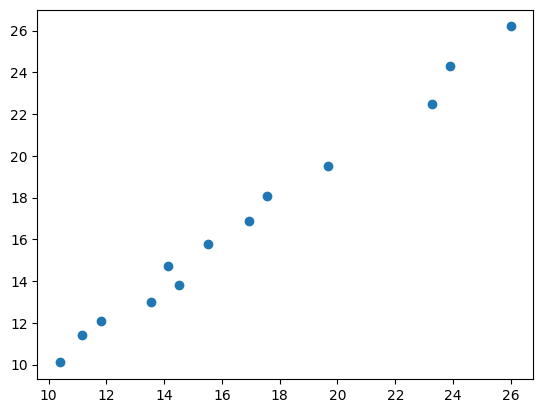

In [203]:
import seaborn as sns

from statsmodels.formula.api import ols

res = multipleLinear()
model = ols('mortality ~ literacy + poverty + gdp + current_health + labor_force ', data=res).fit()
print(model.summary())
sm.stats.anova_lm(model)

b0 = model.params[0] 

b1 = model.params[1] #literacy

b2= model.params[2] #Poverty

b3= model.params[3] #Gdp

b4= model.params[4] #health

b5= model.params[5] #labor_force

prediciton = b0 + b1*literacy_value + b2*poverty_value + b3*gdp_value + b4*health_value + b5*labor_value
plt.scatter(prediciton,mortality_value)


# Question 2

For this question use Yahoo's Finance API for the following tickers:

* Gold futures (GC=F)
* Silver futures (SI=F)
* Copper futures (HG=F)
* Platinum futures (PL=F)

1. Write the best linear regression model that explains gold futures closing prices in terms of opening prices of gold, silver, copper, and platinum futures.
2. Repeat the same for silver, copper and platinum prices.
3. Compare the models you obtained in Steps 1 and 2. Which model is better? How do you decide? Explain.

2.1

In [262]:
import yfinance as yf

msft1 = yf.Ticker("GC=F")
hist1 = msft1.history(period="max")
gold_open1 = hist1['Open']
gold_open = gold_open1.to_frame()


msft2 = yf.Ticker("GC=F")
hist2 = msft2.history(period="max")
gold_close1 = hist2['Close']
gold_close = gold_close1.to_frame()


In [330]:
msft3 = yf.Ticker("SI=F")
hist3 = msft3.history(period="max")
silver_open1 = hist3['Open']
silver_open = silver_open1.to_frame()

msft8 = yf.Ticker("SI=F")
hist8 = msft8.history(period="max")
silver_close1 = hist8['Close']
silver_close = silver_close1.to_frame()

msft4 = yf.Ticker("HG=F")
hist4 = msft4.history(period="max")
copper_open1 = hist4['Open']
copper_open = copper_open1.to_frame()

msft7 = yf.Ticker("HG=F")
hist7 = msft7.history(period="max")
copper_close1 = hist7['Close']
copper_close = copper_close1.to_frame()

msft5 = yf.Ticker("PL=F")
hist5 = msft5.history(period="max")
platinum_open1 = hist5['Open']
platinum_open = platinum_open1.to_frame()

msft6 = yf.Ticker("PL=F")
hist6 = msft6.history(period="max")
platinum_close1 = hist6['Close']
platinum_close = platinum_close1.to_frame()



In [288]:
def extract1(df,name):
    tmp = df
    tmp.columns = [[name]]
    return tmp

def multipleLinearYahoo(): #For close Gold
    
    gold_open3 = extract1(gold_open,'GoldOpen')
    gold_close3 = extract1(gold_close,'GoldClose')
    platinum_open3 = extract1(platinum_open,'Platinum')
    copper_open3 = extract1(copper_open,'Copper')
    silver_open3 = extract1(silver_open,'Silver')
    
    res2 = gold_open3.join([gold_close3,platinum_open3,copper_open3,silver_open3])
    res2.dropna(inplace=True)
    return res2

res2 = multipleLinearYahoo()
X1 = res2[['GoldOpen','Platinum','Copper','Silver']]
XX1 = sm.add_constant(X1)
Y1 = res2['GoldClose']
model1 = sm.OLS(Y1,XX1)
results = model1.fit()
print(results.summary())

reg1 = LinearRegression()
reg1.fit(X1,Y1)
Intercept1=reg1.intercept_
Coefficients1=reg1.coef_
Intercept1
Coefficients1


                            OLS Regression Results                            
Dep. Variable:              GoldClose   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.519e+06
Date:                Thu, 03 Nov 2022   Prob (F-statistic):               0.00
Time:                        20:12:44   Log-Likelihood:                -18718.
No. Observations:                4863   AIC:                         3.745e+04
Df Residuals:                    4858   BIC:                         3.748e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.4589      0.659      0.696

array([[ 9.98708129e-01, -7.77771088e-04,  6.02923974e-01,
         5.58366128e-03]])

In [298]:
model2 = ols('GoldClose ~ GoldOpen + Platinum + Copper + Silver', data=res2).fit()
print(model2.summary())
sm.stats.anova_lm(model2)

a0 = model2.params[0] 

a1 = model2.params[1] 

a2= model2.params[2] 

a3= model2.params[3] 

a4= model2.params[4] 

prediciton1 = a0 + a1*gold_open1.values + a2*platinum_open1.values + b3*copper_open1.values + a4*silver_open1.values 
plt.scatter(prediciton1,gold_close1.values)


                            OLS Regression Results                            
Dep. Variable:              GoldClose   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.519e+06
Date:                Thu, 03 Nov 2022   Prob (F-statistic):               0.00
Time:                        20:18:29   Log-Likelihood:                -18718.
No. Observations:                4863   AIC:                         3.745e+04
Df Residuals:                    4858   BIC:                         3.748e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4589      0.659      0.696      0.4

2.2

In [332]:
def multipleLinearYahoo1():  #For Close Platinum
    
    gold_open3 = extract1(gold_open,'GoldOpen')
    platinum_close3 = extract1(platinum_close,'PlatinumClose')
    platinum_open3 = extract1(platinum_open,'Platinum')
    copper_open3 = extract1(copper_open,'Copper')
    silver_open3 = extract1(silver_open,'Silver')
    
    res3 = gold_open3.join([platinum_close3,platinum_open3,copper_open3,silver_open3])
    res3.dropna(inplace=True)
    return res3

res3 = multipleLinearYahoo1()
X2 = res3[['GoldOpen','Platinum','Copper','Silver']]
XX2 = sm.add_constant(X2)
Y2 = res3['PlatinumClose']
model2 = sm.OLS(Y2,XX2)
results = model2.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:          PlatinumClose   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 2.080e+06
Date:                Thu, 03 Nov 2022   Prob (F-statistic):               0.00
Time:                        21:00:22   Log-Likelihood:                -17502.
No. Observations:                4863   AIC:                         3.501e+04
Df Residuals:                    4858   BIC:                         3.505e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.8707      0.513      1.696

In [333]:
def multipleLinearYahoo2():
    
    gold_open3 = extract1(gold_open,'GoldOpen')
    copper_close3 = extract1(copper_close,'CopperClose')
    platinum_open3 = extract1(platinum_open,'Platinum')
    copper_open3 = extract1(copper_open,'Copper')
    silver_open3 = extract1(silver_open,'Silver')
    
    res4 = gold_open3.join([copper_close3,platinum_open3,copper_open3,silver_open3])
    res4.dropna(inplace=True)
    return res4

res4 = multipleLinearYahoo2()
X3 = res4[['GoldOpen','Platinum','Copper','Silver']]
XX3 = sm.add_constant(X3)
Y3 = res4['CopperClose']
model3 = sm.OLS(Y3,XX3)
results = model3.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            CopperClose   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 1.032e+06
Date:                Thu, 03 Nov 2022   Prob (F-statistic):               0.00
Time:                        21:01:43   Log-Likelihood:                 8984.9
No. Observations:                4863   AIC:                        -1.796e+04
Df Residuals:                    4858   BIC:                        -1.793e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0021      0.002     -0.938

In [335]:
def multipleLinearYahoo3():
    
    gold_open3 = extract1(gold_open,'GoldOpen')
    silver_close3 = extract1(silver_close,'SilverClose')
    platinum_open3 = extract1(platinum_open,'Platinum')
    copper_open3 = extract1(copper_open,'Copper')
    silver_open3 = extract1(silver_open,'Silver')
    
    res5 = gold_open3.join([silver_close3,platinum_open3,copper_open3,silver_open3])
    res5.dropna(inplace=True)
    return res5

res5 = multipleLinearYahoo3()
X4 = res5[['GoldOpen','Platinum','Copper','Silver']]
XX4 = sm.add_constant(X4)
Y4 = res5['SilverClose']
model4 = sm.OLS(Y4,XX4)
results = model4.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            SilverClose   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 9.080e+05
Date:                Thu, 03 Nov 2022   Prob (F-statistic):               0.00
Time:                        21:03:33   Log-Likelihood:                -1304.6
No. Observations:                4863   AIC:                             2619.
Df Residuals:                    4858   BIC:                             2652.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0358      0.018     -1.947

2.3

When we look at the R-square value, it is observed that the 1st step has a better value. However, the p-values ​​of step 2 make more sense.

# Question 3

1. Write a function that takes a ticker symbol and returns a pandas dataframe that for each day puts a 1 when the closing price is higher than the opening price, a 0 when the closing price is lower than the opening price.
2. Write the best logistic regression that predicts the time series you obtain from Step 1 for gold futures against the opening prices of gold, silver, copper, and platinum prices.
3. Repeat the same for silver, copper, and platinum prices.
4. Compare the models you obtained from Steps 2 and 3. Decide which is the best model, and explain your reasoning.
5. Does any of the models provide a good fit? Explain.

In [438]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from zipfile import ZipFile
from io import BytesIO
from urllib.request import urlopen
from collections import Counter
from sklearn.metrics import confusion_matrix

from statsmodels.formula.api import logit
from statsmodels.api import Logit

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeRegressor

3.1

In [493]:
def checker(tickers) :
    dogru = 1
    yanlis = 0
    msft1 = yf.Ticker(tickers)
    hist1 = msft1.history(period="max")
    opening = hist1['Open']
    closing = hist1['Close']
    df = pd.DataFrame(columns=['Element1'])
    a=len(hist1)
    for i in range(a):
        if opening[i] < closing[i]:
            df.loc[i] = [dogru]
        else :
            df.loc[i] = [yanlis]
    return df

gold = checker("GC=F")
silver = checker('SI=F')
copper = checker('HG=F')
platinum = checker('PL=F')
gold #Deneme

,Element1
0,0
1,1
2,0
3,0
4,0
...,...
5561,0
5562,0
5563,1
5564,0


3.2 and 3.3 , 3.4 , 3.5

In [ ]:
msft1 = yf.Ticker("GC=F")
hist1 = msft1.history(period="max")
gold_open1 = hist1['Open']
gold_open = gold_open1.to_frame().values

msft3 = yf.Ticker("SI=F")
hist3 = msft3.history(period="max")
silver_open1 = hist3['Open']
silver_open = silver_open1.to_frame().values

msft4 = yf.Ticker("HG=F")
hist4 = msft4.history(period="max")
copper_open1 = hist4['Open']
copper_open = copper_open1.to_frame().values

msft5 = yf.Ticker("PL=F")
hist5 = msft5.history(period="max")
platinum_open1 = hist5['Open']
platinum_open = platinum_open1.to_frame().values

x=gold_open1
y=gold

plt.scatter(x,y)
plt.show()

x_train, x_test, y_train, t_test = train_test_split(x,y,random_state=1)

log_reg = LogisticRegression()
log_reg.fit(x_train,y_train)

# Question 4

For this question use the following [data](https://archive.ics.uci.edu/ml/datasets/credit+approval):


In [3]:
credit = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/credit-screening/crx.data', header=None)

fn = {'+': 1, '-': 0}

X = credit.replace('?',0).iloc[:,[1,2,7,10,14]]
y = credit.iloc[:,15].map(lambda x: fn.get(x,0))

1. Split the data into training and test set.
2. Write different logistic regression models predicting y against X.
3. Construct [confusion matrices](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) on the test data set for these different models.
4. Analyze these models. Explain which model is the best model you have found.
5. Repeat Steps 1-4 several times. Does your best model stay as the best model? What should be the correct protocol to decide on the best model explaining the data?

Question 4 :

In [530]:
graph1

,1,2,7,10,14
0,30.83,0.000,1.25,1,0
1,58.67,4.460,3.04,6,560
2,24.50,0.500,1.50,0,824
3,27.83,1.540,3.75,5,3
4,20.17,5.625,1.71,0,0
...,...,...,...,...,...
685,21.08,10.085,1.25,0,0
686,22.67,0.750,2.00,2,394
687,25.25,13.500,2.00,1,1
688,17.92,0.205,0.04,0,750


In [531]:
graph2

0      1
1      1
2      1
3      1
4      1
      ..
685    0
686    0
687    0
688    0
689    0
Name: 15, Length: 690, dtype: int64

In [528]:
credit = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/credit-screening/crx.data', header=None)
fn = {'+': 1, '-': 0}

graph1 = credit.replace('?',0).iloc[:,[1,2,7,10,14]]
graph2 = credit.iloc[:,15].map(lambda x: fn.get(x,0))

def bootstrap(X,y,model):
    res = []
    for i in range(100):
        X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.75)
        model.fit(X_train,y_train)
        res.append(model.score(X_test,y_test))
    tmp = sorted(res)[3:97]
    return (min(tmp),max(tmp))

X= graph1[[1,2,7,10,14]]
y=graph2
model = LogisticRegression(max_iter=1500)
bootstrap(X,y,model)


(0.7109826589595376, 0.8265895953757225)

In [529]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.75)

model = LogisticRegression(max_iter=1500)
model.fit(X_train,y_train)
print(model.score(X_test,y_test))
y_predict = model.predict(X_test)
confusion_matrix(y_test,y_predict)

0.7456647398843931


array([[83,  8],
       [36, 46]])

Confusion Matrix

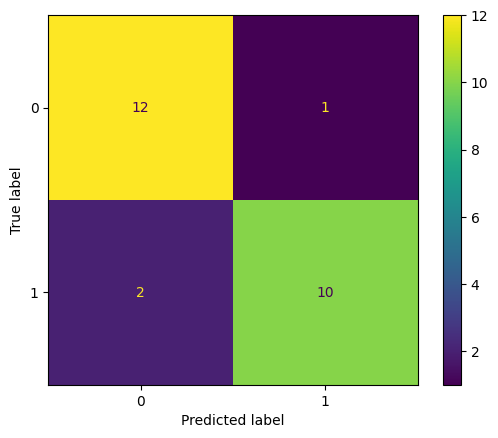

In [525]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
X, y = make_classification(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=0)
clf = SVC(random_state=0)
clf.fit(X_train, y_train)
SVC(random_state=0)
predictions = clf.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)
disp.plot()

plt.show()

In [527]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.75)

model = LogisticRegression(max_iter=1500)
model.fit(X_train,y_train)
print(model.score(X_test,y_test))
y_predict = model.predict(X_test)
confusion_matrix(y_test,y_predict)

0.84


array([[14,  1],
       [ 3,  7]])